<a href="https://colab.research.google.com/github/tifftknguyen/Final-Project-456/blob/tiff/final-project-456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
## Tiffany Nguyen
## Giselle Hernandez
## CECS 456 Sec 01 - Machine Learning
## Professor Wenlu Zhang

### Comparing CNN vs Fully Connected Neural Network on Natural Images Data Set

In [2]:
! pip install -q kaggle

# Loading Data Set

In [3]:
import kagglehub

In [4]:
path = kagglehub.dataset_download("prasunroy/natural-images")

Using Colab cache for faster access to the 'natural-images' dataset.


In [5]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/natural-images


## Set Up Imports & Parameters

In [6]:
# INITIAL SETUP

import os, tensorflow as tf
from tensorflow.keras import layers, models


# imports based on the labs & hw to create visuals
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [7]:
data_dir = os.path.join(path, "natural_images")

In [8]:
# SMALLEST AMOUNT OF PARAMETERS FOR THE SAKE OF TESTING & TROUBLESHOOTING
IMG_SIZE   = (64, 64)
BATCH_SIZE = 64
SEED       = 42

## Reading from Natural Images Data Set for Training & Validation

In [15]:
# Splitting into Training Set
training_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,  # 20% of the data going to validation data set
    subset = "training", # setting this as the training set
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.


In [16]:
# Splitting data into Validation Set
validation_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2, # 20% going to validation set
    subset = "validation", # validation set
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE
)


Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


## To Confirm Classses from Natural Images Data Set

In [17]:
# for confirmation we loaded the data set correctly
classes = training_data.class_names
num_classes = len(classes)

print("Classes in Natural Images: ", classes)
print("Number of Classes in Nature Images: ", num_classes)

Classes in Natural Images:  ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
Number of Classes in Nature Images:  8


In [18]:
# data augmentation to increase data set
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"), # random orientation
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.02),  # random scales
    layers.RandomContrast(0.10), # random color jitters
], name="data_augmentation")

# Model 1: Fully Connected Neural Network

### Building the Fully Connected Neural Network

In [19]:
# Model 1: fully connected neutral network
fcn = models.Sequential([
    layers.Input(shape=(64, 64, 3)),

    # to resize and adjust images
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Flatten(),

    # hidden Layer 1
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # hidden Layer 2 --> connected to layer 1
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # hidden Layer 3 ---> connected to layer 2
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Output Layer
    layers.Dense(8, activation='softmax')
])

fcn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    12,583,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,249,288 (50.54 MB)

 Trainable params: 13,245,704 (50.53 MB)

 Non-trainable params: 3,584 (14.00 KB)

### Compling & Training the FC Neutral Network

In [20]:
fcn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = fcn.fit(
    training_data,
    validation_data=validation_data,
    epochs=10
)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 40s 412ms/step - accuracy: 0.5287 - loss: 1.4744 - val_accuracy: 0.3648 - val_loss: 2.9463
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 35s 397ms/step - accuracy: 0.6969 - loss: 0.8966 - val_accuracy: 0.7136 - val_loss: 0.8591
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 398ms/step - accuracy: 0.7246 - loss: 0.7693 - val_accuracy: 0.6715 - val_loss: 0.9200
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 401ms/step - accuracy: 0.7335 - loss: 0.7394 - val_accuracy: 0.7614 - val_loss: 0.6521
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 385ms/step - accuracy: 0.7490 - loss: 0.6634 - val_accuracy: 0.7708 - val_loss: 0.6448
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 43s 404ms/step - accuracy: 0.7721 - loss: 0.6236 - val_accuracy: 0.7353 - val_loss: 0.7108
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 389ms/step - accuracy: 0.7850 - loss: 0.5859 - val_accuracy: 0.7766 - val_loss: 0.6137
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 41s 393ms/step - accuracy: 0.7828 - loss: 0.5903 - val_accu

### Evaluation Score

In [21]:
eval_score = fcn.evaluate(validation_data)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.7908 - loss: 0.6108


In [22]:
print("Total loss on Testing set:", eval_score[0])

Total loss on Testing set: 0.6005700826644897


In [23]:
print("Accuracy of Testing set:", eval_score[1])

Accuracy of Testing set: 0.7860768437385559


### Visualizations

Training vs Validation Graph

Text(0.5, 0, 'Epochs')

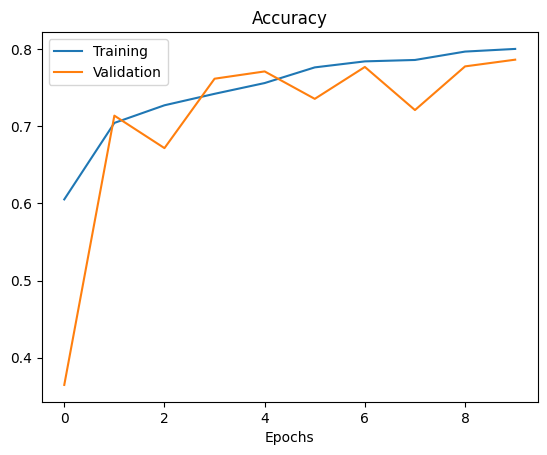

In [24]:
# to visualize comparison btw training set & validation set
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

Classifying the images: Seeing the predicted vs the actual

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


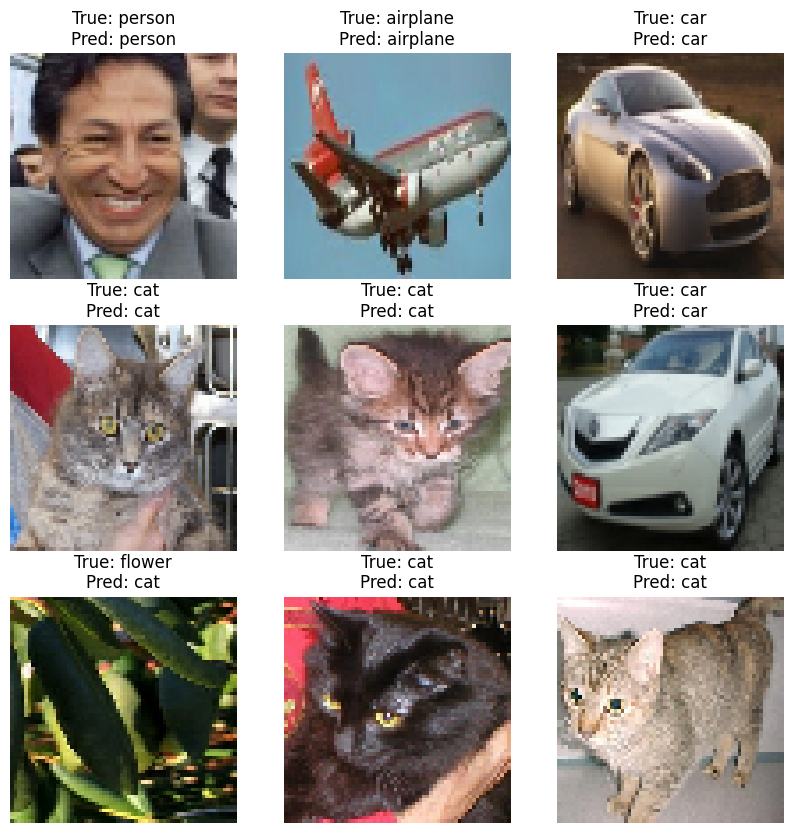

In [25]:
# Grabbing the images from the Natural Image Data Set
images, labels = next(iter(validation_data))
images = images[:9]
labels = labels[:9]

# our model prediction
predictions = fcn.predict(images)

class_names = training_data.class_names

# to display the images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    # gets the actual name & predicted label
    true_name = class_names[labels[i]]
    pred_name = class_names[np.argmax(predictions[i])]

    plt.title(f"True: {true_name}\nPred: {pred_name}")
    plt.axis("off")

plt.show()

# Model 2: SIMPLE CNN

## BUILDING THE CNN

In [26]:
def build_cnn_model(input_shape=(28, 28, 1), num_classes=10):

    model = models.Sequential([
        # INPUT LAYER
        layers.Input(shape=input_shape),

        # BLOCK 1: 2 CONV LAYERS + POOLING
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_1'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool1'),
        layers.Dropout(0.25),

        # BLOCK 2: 2 CONV LAYERS + POOLING
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_1'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool2'),
        layers.Dropout(0.25),

        # BLOCK 3: 2 CONV LAYERS + POOLINGB
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_1'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool3'),
        layers.Dropout(0.25),

        # FLATTEN & DENSE LAYERS
        layers.Flatten(),
        layers.Dense(256, activation='relu', name='fc1'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', name='fc2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # OUTPUT SINGLE LAYER/NEURON
        layers.Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# BUILD MODEL
cnn_model = build_cnn_model(input_shape=(28, 28, 1), num_classes=10)

# DISPLAY ARCHITECHTURE
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 619,114 (2.36 MB)

 Trainable params: 617,450 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

## COMPILING & TRAINING THE SIMPLE SNN

In [28]:
# COMPILE MODEL

cnn_model.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])
print("Model compiled successfully!")

Model compiled successfully!


# EVALUATION SCORE

# VISUALIZATIONS

Classifying the images: Seeing the predicted vs the actual